# BUDT 704 Data Processing and Analysis in Python 

<br><img src="https://www.nosegraze.com/wp-content/uploads/2013/03/amazon-buys-goodreads.jpg" />

**Project Title:**<br>
- How to Judge a Book by Its Cover

**Group Name:**<br>
- Authors of Analysis

**Group Members:**<br>
- Vatsal Srivastava
- Shashank Vidyadhar Patil
- Aditi Patel
- Gunjan Sharma 
- Urshilah Senthilnathan
- Kristina Sutliff

## Introduction
<hr style="width:100%;text-align:left;margin-left:0">

The Global book market is expected to reach $142.33 Billion by the end of 2022. Amazon has been a dominant player in this industry. One of the reasons for this dominance is the insights about bibliophiles that they gather through vital subsidiaries like Goodreads and Audible. 
    
Goodreads is a subsidiary of Amazon that provides book recommendations, along with other services, to its users. Members of Goodreads can keep track of the books they have read, are currently reading, and want to read in the future. The website also allows its users to connect with friends so that they can see what books their friends are reading. Additionally, the website consists of interviews with various authors where they talk about recently published books as well as promote their upcoming books. What makes Goodreads useful is that their lists of recommendations change dynamically over time so that the user always has access to the most relevant recommendations that match their preferences. 

As a group of consultants hired by Amazon to explore new revenue generating business opportunities and optimize their book ecosystem, we will analyze Goodreads data to research focus areas that can be utilized to their full potential. The answers to following questions will aid Amazon in making critical business decisions and leveraging benefits of Goodreads.

### Through this analysis project we will answer the following questions:

1. Among the popular genres, what are the best performing books for these genres ranked according to book score? Book score is a metric that will be based on rating, review and awards related data to rank a book. <br><br>
2. What are the most common keywords in the book title for different top performing genres? <br><br>
3. What genre and series category would attract more publishers based on average rating and review count? <br><br>
4. Is there a tendency to reduce the number of pages in recent books? If yes, what can be done to meet this trend? <br><br>
5. Which books can be converted into audio books? What is the predicted price for such books? <br><br>


## Our Dataset
We will mainly be using **2** datasets to conduct this research.
<hr style="width:100%;text-align:left;margin-left:0">

**Kaggle Dataset**:<br>
The following dataset will be used that contains all the data related to Goodreads books - https://www.kaggle.com/datasets/austinreese/goodreads-books?select=goodreads_books.csv

The data contains listing of all details of Goodreads book till 2021. Overall the data has the following columns: 
- Book Id
- Book Title
- Goodreads Link
- Series
- Cover Link
- Author
- Author Link
- Rating Count
- Review Count
- Average Rating
- Five Star Ratings
- Four Star Ratings
- Three Star Ratings
- Two Star Ratings
- One Star Ratings
- Number of Pages
- Date Publisher
- Publisher
- Original Title
- Genre and Votes
- ISBN
- ISBN13
- ASIN
- Settings
- Characters
- Awards
- Amazon Redirect Link
- Worldcat Redirect Link
- Recommended Books
- Books in Series 
- Description

**Data Volume**:<br>
52199 rows, 31 columns


**Audible Dataset**:<br>
To derive insights about the audio books on audible, we rely on a dataset with extensive collection of titles. The dataset is compiled by Toby Manders, a data science enthusiast and refers to the dataset in one of his [blogs](https://towardsdatascience.com/scraping-and-exploring-the-entire-english-audible-catalog-ea279cd09f88).
The dataset can be downloaded from the following link: https://drive.google.com/file/d/1btf5Eq6U-GfG3iScpX6lMluCt6SgS45c/view

The data contains listing of all details of Goodreads book till 2021. Overall the data has the following columns: 
- asin
- author
- category
- length
- link
- narrator
- price
- rating
- rating_count
- release_date
- title
										
**Data Volume**:<br>
460544 rows, 11 columns

## **Choice for Heavier Grading on Data Processing or Data Analysis** - 
<hr style="width:100%;text-align:left;margin-left:0">

Based on the two choices we would like to choose **`Data Analysis`** due to the following reasons:
- We have two main datasets that provide us details about book on Goodreads and Audible
- We have processed both datasets to clean it and extract information to get a more simplified version of the data. For example, extracting main genre of the book from all genres based on highest votes or extracting duration of book based on the length of book
- But our main focus is to form a strategy for Amazon that will help them leverage more value from Goodreads that we will be presenting through our data analysis hence we would like to choose data analysis as our focus

## Data Exploration and Cleaning
<hr style="width:100%;text-align:left;margin-left:0">

In [751]:
#Importing the libraries
import numpy as np
import pandas as pd
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *
import plotly.express as px
import plotly.graph_objects as go
from sklearn import neighbors
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from scipy import spatial
import tensorflow_hub as hub
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn import metrics
import math
from tabulate import tabulate
from wordcloud import WordCloud
import imageio.v2 as imageio

### <u>Reading Goodreads Data<u>

In [752]:
# Loading the dataset file into dataframe
path = ''
df_goodreads = pd.read_csv(path +'../goodreads_books.csv')
df_goodreads.shape

(52199, 31)

In [753]:
# Getting rid of columns that are irrelevant for our analysis 
df_goodreads.drop(columns=['settings', 'amazon_redirect_link', 'worldcat_redirect_link', 
                           'recommended_books', 'books_in_series', 'description', 'asin',
                           'link', 'author_link', 'cover_link','original_title'], inplace=True)

#### Identifying and setting Index
Out of the potential columns that can be considered for indexing the data; ISBN, ISBN13, Title and Book ID are some of them. We will identify the most suitable column that can uniquely identify a book and its details. 

In [754]:
# Determining duplicates for title column 
print('\n Duplicates in Book Title ->',df_goodreads['title'].duplicated().sum())

# Determining observations that don't have ISBN and ISBN13
isbn_mask = df_goodreads['isbn'].isnull() & df_goodreads['isbn13'].isnull()
print("\n Number of observation that don't have either ISBN or ISBN13 ->", isbn_mask.sum())

# Validating if all the books have unique Book IDs
print('\n Unique Book IDs ->',len(df_goodreads['id'].unique()))


 Duplicates in Book Title -> 2514

 Number of observation that don't have either ISBN or ISBN13 -> 11883

 Unique Book IDs -> 52199


We observe from above results, Book Title and ISBN cannot be used to uniquely identify a book as there are duplicates and missing values in them respectively. Hence, we identify Book ID to be the most suitable column to index the data.

In [755]:
# Setting index as book_id since it is unique for each observation
df_goodreads.set_index('id').head()

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,isbn,isbn13,characters,awards
id,,,,,,,,,,,,,,,,,,,
630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN
9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400.0,October 29th 2006,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN
6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,NaN
39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,"Aloysius X.L. Pendergast, Margo Green, William...",NaN
998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,Independent Publisher Book Award (IPPY) Nomine...


### <u>Cleaning & Processing Goodreads Data</u>
First, we will be analyzing the data to check if there are any columns that are not relevant to our research so that we can permanently drop them. Second, we will check there are any missing values in the columns of our interest, if found can we impute them or drop them. Third, identify columns that contain information that can be simplified to get straightforward data.

As seen above, ISBN columns are not relevant to our research hence we can drop them permanently.

In [756]:
# Dropping ISBN columns
df_goodreads.drop(columns=['isbn', 'isbn13'], inplace=True)

Removing the Rows where average rating is Zero as it will be a major factor in calculation of a book score

In [757]:
#Dropping the rows where average_rating = 0
df_goodreads.drop(df_goodreads[df_goodreads['average_rating'] == 0].index, inplace=True)

In [758]:
# Check if rating columns contain null values
df_goodreads[['rating_count', 'review_count','average_rating', 'five_star_ratings', 'four_star_ratings', 'three_star_ratings',
  'two_star_ratings', 'one_star_ratings']].isnull().sum()

rating_count          0
review_count          0
average_rating        0
five_star_ratings     0
four_star_ratings     0
three_star_ratings    0
two_star_ratings      0
one_star_ratings      0
dtype: int64

As seen above, there are no Books with a missing rating data.

Since many books are in different languages, their data contains random characters and needs to be removed. We can use the below following function to keep only english characters in the data. We are primarily interested in title, author, series and publisher columns.

In [759]:
# Function for filtering out non english characters
def filter_non_english_characters(input_string):
    try:
        input_string.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

The author and title columns have all observations in the data whereas the publisher and series data have many observations that have missing values. Hence we will only apply the above function to author and title columns and use a seperate method to clean the series and publisher data.

In [760]:
# Keeping only those observations that do not have any non english characters
df_goodreads = df_goodreads.copy(deep=True)
df_goodreads = df_goodreads[df_goodreads['title'].apply(lambda x: filter_non_english_characters(x))
                             & df_goodreads['author'].apply(lambda x: filter_non_english_characters(x))]

In [761]:
# determining series and publisher rows that have non english characters by using below regex
non_english_chars = re.compile('^[^A-Za-z0-9_\-\'\"\(\)]')

# dropping the gathered observations
non_english_chars_index = df_goodreads[df_goodreads['series'].str.match(non_english_chars)
                                       | df_goodreads['publisher'].str.match(non_english_chars)].index
df_goodreads.drop(non_english_chars_index, inplace=True)

In [762]:
# Determine Non Series Books which have missing Genre and Publication Date data
non_series_mask = ((df_goodreads['date_published'].isnull() | df_goodreads['genre_and_votes'].isnull()) & df_goodreads['series'].isnull())
non_series_mask.sum()

2284

Since there are Books that are not part of any Series that contain missing Publication Date and Genres we can delete these Books permanently and we won't be affecting any books that are a part of any series.

In [763]:
# Deleting the above gathered data with missing values
df_goodreads.drop(df_goodreads[non_series_mask].index, inplace=True)

Identifying books that are a part of Series which have missing Publication Date or Genre data.

In [764]:
# Determining books that are part of series but do not have the publication date and genre data
((df_goodreads['date_published'].isnull() | df_goodreads['genre_and_votes'].isnull()) & df_goodreads['series'].notnull()).sum()

490

To solve above issue and to simplify the data for further analysis, we can split the series column to extract series name and the book number in that series.

In [765]:
# Splitting series column based on # to retrieve required data
series_split = df_goodreads['series'].str.extract(pat='(\w+) #(\d+)')
series_split

,0,1
0,Private,5
1,Love,2
2,Line,2
3,Pendergast,2
4,NaN,NaN
...,...,...
52194,NaN,NaN
52195,NaN,NaN
52196,NaN,NaN
52197,Private,4


In [766]:
# Dropping the old series column
df_goodreads.drop(columns='series', inplace=True)

# Creating new series name and book number column to provide simplified data
df_goodreads['series_name'] = series_split[0]
df_goodreads['book_number_in_series'] = series_split[1]

Let us cross check if the Books in series have corresponding Book Number.

In [767]:
# check if book is series does not have book number
(df_goodreads['series_name'].notnull() & df_goodreads['book_number_in_series'].isnull()).sum()

0

For our analysis, let us extract the leading genre , i.e. the genre with the most votes and populate it in a new column. Also we extract only the year of publication as it is of interest from the date published column.

In [768]:
# Creating Main Genre column that can be used for further analysis`
df_goodreads['main_genre'] = df_goodreads['genre_and_votes'].str.split('\d').str[0].str.rstrip()

In [769]:
# Extracting year from date published 
df_goodreads['year_published'] = df_goodreads['date_published'].str.extract(pat='(\d{4})').values
df_goodreads['year_published'] = df_goodreads['year_published'].astype('Int64')

In [770]:
# Drop the old date published column which is no longer required.
df_goodreads.drop(columns='date_published', inplace=True)

We will be dividing the series of books into 4 categories to easily identify the group that it can be associated with. The categories are - <br>`Individual Book`, <br>`Duology` - Series having 2 books, <br> `Trilogy` - Series having 3 books, <br> `Multiple books` - Series having more than 3 books. <br>
<font color='red'>**Note**</font> - The books that have no series number information will be considered as individual books.

In [771]:
# Grouping the data by series name to check how many parts the series has
series_grouped = df_goodreads.sort_values(['average_rating'], ascending=False).groupby('series_name')['book_number_in_series'].first()
series_grouped = pd.DataFrame(series_grouped)

# Creating a map to categorize the series
category_map = {
    '1' : 'Individual book',
    '2' : 'Duology',
    '3' : 'Trilogy'
}
def categorize_series(item):
    if item in category_map:
        return category_map[item]
    else:
        return 'Multiple books'

# Applying function to map the categories and then merging with the final dataframe
series_grouped['series_category'] = series_grouped['book_number_in_series'].apply(categorize_series)
series_grouped.drop(columns='book_number_in_series', inplace=True)

df_goodreads = pd.merge(df_goodreads, series_grouped, how='left', left_on = 'series_name', right_on='series_name')
df_goodreads['series_category'].fillna('Individual book', inplace=True)

In [772]:
df_goodreads.head()

,id,title,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,...,number_of_pages,publisher,genre_and_votes,characters,awards,series_name,book_number_in_series,main_genre,year_published,series_category
0,630104,Inner Circle,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,...,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,Private,5,Young Adult,2007,Multiple books
1,9487,A Time to Embrace,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,...,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,Love,2,Christian Fiction,2006,Multiple books
2,6050894,Take Two,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,...,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,Line,2,Christian Fiction,2009,Trilogy
3,39030,Reliquary,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,...,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,Pendergast,2,Thriller,1997,Trilogy
4,998,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,...,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,NaN,Economics-Finance,1995,Individual book


### <u>Reading Audible data</u>

Let us now load the **Audible** dataset.

In [773]:
# Load the audible dataset
audible_df = pd.read_csv('../all_english_audible.csv')
audible_df.head()

,asin,author,category,length,link,narrator,price,rating,rating_count,release_date,title
0,NaN,Paul Stanley,Arts & Entertainment,4 hrs and 38 mins,https://www.audible.com/pd/Backstage-Pass-Audi...,Sean Pratt,20.52,4.0,78.0,2019-04-30,Backstage Pass
1,B0052OM9XK,Simon Pegg,Arts & Entertainment,4 hrs and 50 mins,https://www.audible.com/pd/Nerd-Do-Well-Audiob...,Simon Pegg,24.50,4.5,872.0,2011-06-09,Nerd Do Well
2,B077XN66F8,Sidney Lumet,Arts & Entertainment,7 hrs and 23 mins,https://www.audible.com/pd/Making-Movies-Audio...,Richard M. Davidson,20.99,5.0,90.0,2017-12-05,Making Movies
3,B00C75YMJ6,Phil Robertson,Arts & Entertainment,4 hrs and 57 mins,https://www.audible.com/pd/Happy-Happy-Happy-A...,"Al Robertson, Phil Robertson",20.99,4.5,805.0,2013-05-07,"Happy, Happy, Happy"
4,B00DCD16GE,"Robert Greenberg, The Great Courses",Arts & Entertainment,24 hrs and 25 mins,https://www.audible.com/pd/How-to-Listen-to-an...,Robert Greenberg,52.95,5.0,585.0,2013-07-08,How to Listen to and Understand Opera


Let us first make a copy of the cleaned data for the analysis.

In [774]:
# Make a local copy of cleaned data
goodreads_df = df_goodreads.copy(deep=True)

### <u>Cleaning & Processing Audible data<u>

Let us drop the irrelevant columns like **asin** and **link** which are not required for our analysis.

In [775]:
# Drop irrelevant columns
audible_df.drop(['asin', 'link'], axis=1, inplace=True)
audible_df

,author,category,length,narrator,price,rating,rating_count,release_date,title
0,Paul Stanley,Arts & Entertainment,4 hrs and 38 mins,Sean Pratt,20.52,4.0,78.0,2019-04-30,Backstage Pass
1,Simon Pegg,Arts & Entertainment,4 hrs and 50 mins,Simon Pegg,24.50,4.5,872.0,2011-06-09,Nerd Do Well
2,Sidney Lumet,Arts & Entertainment,7 hrs and 23 mins,Richard M. Davidson,20.99,5.0,90.0,2017-12-05,Making Movies
3,Phil Robertson,Arts & Entertainment,4 hrs and 57 mins,"Al Robertson, Phil Robertson",20.99,4.5,805.0,2013-05-07,"Happy, Happy, Happy"
4,"Robert Greenberg, The Great Courses",Arts & Entertainment,24 hrs and 25 mins,Robert Greenberg,52.95,5.0,585.0,2013-07-08,How to Listen to and Understand Opera
...,...,...,...,...,...,...,...,...,...
460539,Alyson Noël,Teens,10 hrs and 10 mins,Kyla Garcia,10.20,0.0,0.0,2018-10-22,Unrivalled
460540,Sara Shepard,Teens,7 hrs and 23 mins,Cassandra Morris,6.67,0.0,0.0,2019-05-02,Never Have I Ever
460541,Jay Kristoff,Teens,10 hrs and 40 mins,NaN,14.18,0.0,0.0,2019-08-22,DEV1AT3
460542,Ibi Zoboi,Teens,11 hrs and 17 mins,"Bahni Turpin, Ron Butler",10.20,0.0,0.0,2019-01-17,Black Enough: Stories of Being Young & Black i...


The rows that are duplicate are identified and removed to avoid contamination of the training and test dataset

In [776]:
# Drop duplicates
audible_df.drop_duplicates(inplace=True)

Each observation should ideally represent an unique author and book pair. We are processing the data set to identify if there are multiple observations for the same book and author. A book is uniquely identified using its title and author. 

In [777]:
# Set title as index
audible_df.set_index('title')

,author,category,length,narrator,price,rating,rating_count,release_date
title,,,,,,,,
Backstage Pass,Paul Stanley,Arts & Entertainment,4 hrs and 38 mins,Sean Pratt,20.52,4.0,78.0,2019-04-30
Nerd Do Well,Simon Pegg,Arts & Entertainment,4 hrs and 50 mins,Simon Pegg,24.50,4.5,872.0,2011-06-09
Making Movies,Sidney Lumet,Arts & Entertainment,7 hrs and 23 mins,Richard M. Davidson,20.99,5.0,90.0,2017-12-05
"Happy, Happy, Happy",Phil Robertson,Arts & Entertainment,4 hrs and 57 mins,"Al Robertson, Phil Robertson",20.99,4.5,805.0,2013-05-07
How to Listen to and Understand Opera,"Robert Greenberg, The Great Courses",Arts & Entertainment,24 hrs and 25 mins,Robert Greenberg,52.95,5.0,585.0,2013-07-08
...,...,...,...,...,...,...,...,...
Unrivalled,Alyson Noël,Teens,10 hrs and 10 mins,Kyla Garcia,10.20,0.0,0.0,2018-10-22
Never Have I Ever,Sara Shepard,Teens,7 hrs and 23 mins,Cassandra Morris,6.67,0.0,0.0,2019-05-02
DEV1AT3,Jay Kristoff,Teens,10 hrs and 40 mins,NaN,14.18,0.0,0.0,2019-08-22


In [778]:
# Determine number of titles and their count in the dataset
audible_df['title'].value_counts()

AUDIBLE ESCAPE        21731
A Chef's Table          307
Un-Cabaret Stories      228
Will Durst 0            185
Doctor Who               97
                      ...  
Cold Day in Hell          1
Paper Butterfly           1
The Crazy School          1
Hocus                     1
We Are Not Okay           1
Name: title, Length: 297847, dtype: int64

In [779]:
# Explore the different titles with multiple occurences
mask = audible_df['title']=='AUDIBLE ESCAPE'
audible_df[mask].head()

,author,category,length,narrator,price,rating,rating_count,release_date,title
1753,"Rebecca Housel, J. Jeremy Wisnewski",Arts & Entertainment,6 hrs and 1 min,Rebecca Housel,19.95,3.0,57.0,2010-03-30,AUDIBLE ESCAPE
10148,Sophie Morgan,Bios & Memoirs,8 hrs and 39 mins,Tatiana Sokolov,27.99,4.0,97.0,2013-04-29,AUDIBLE ESCAPE
17705,Joan Nestle,Bios & Memoirs,6 hrs and 11 mins,Allyson Johnson,17.99,0.0,0.0,2012-03-13,AUDIBLE ESCAPE
17896,Andrea di Robilant,Bios & Memoirs,11 hrs and 40 mins,Paul Hecht,27.99,4.0,12.0,2011-11-30,AUDIBLE ESCAPE
18974,Patrick Califia-Rice,Bios & Memoirs,15 hrs and 36 mins,Marc Bachmann,23.94,4.5,7.0,2012-03-12,AUDIBLE ESCAPE


We can see that there are 21731 books with a title as 'AUDIBLE ESCAPE'. These observations are ought to be erroneous since the same redundant title is provided for books by various authors and with different categories for each of them. It is essential to drop all the observations with title as 'AUDIBLE ESCAPE'.

In [780]:
# Filter out the books with invalid or unknown title
audible_df = audible_df.copy(deep=True)
audible_df = audible_df[audible_df['title']!='AUDIBLE ESCAPE']

It is essential to check other titles with multiple occurances before dropping duplicate titles. We need to decide on the observation to retain from the list of observations with repetitive titles.

In [781]:
# Explore other titles with multiple occcurences
mask = audible_df['title']=="Will Durst 0"
audible_df[mask].head()

,author,category,length,narrator,price,rating,rating_count,release_date,title
326900,Will Durst,Comedy,2 mins,NaN,0.95,0.0,0.0,2007-04-13,Will Durst 0
326903,Will Durst,Comedy,2 mins,NaN,0.95,0.0,0.0,2007-05-08,Will Durst 0
326907,Will Durst,Comedy,2 mins,NaN,0.95,0.0,0.0,2007-06-08,Will Durst 0
326909,Will Durst,Comedy,2 mins,NaN,0.95,0.0,0.0,2007-05-22,Will Durst 0
329575,Will Durst,Comedy,2 mins,NaN,0.95,1.0,1.0,2006-11-28,Will Durst 0


We observe that there are titles with the same author with different versions. Let us retain only one entry for each title-author combination in the dataset. Towards that, convert the release_date column to datetime type and retain only the latest released version of each book and author combination.

In [782]:
# Convert the release_date column to datetime
audible_df['release_date'] = pd.to_datetime(audible_df['release_date'])

In [783]:
# Sort the books based on the release date, drop duplicates for title-author pair and keep only the latest for each pair.
audible_df = audible_df.sort_values('release_date')
audible_df.drop_duplicates(subset=['title', 'author'], keep='last', inplace=True)
audible_df.head()

,author,category,length,narrator,price,rating,rating_count,release_date,title
12122,Po Bronson,Bios & Memoirs,9 hrs and 50 mins,Po Bronson,27.97,3.5,76.0,1995-12-31,The Nudist on the Late Shift and Other True Ta...
33219,"John P. Kotter, Jeanie Daniel Duck",Business,1 hr and 40 mins,uncredited,7.95,4.0,37.0,1997-11-03,Leading Change
38106,"James L. Heskett, Thomas O. Jones, Frederick F...",Business,1 hr and 12 mins,uncredited,4.95,3.5,11.0,1997-11-03,Customer Loyalty
168928,Richard North Patterson,Mysteries & Thrillers,5 hrs and 3 mins,Ken Howard,11.90,3.5,14.0,1998-01-08,The Lasko Tangent
159155,Richard North Patterson,Mysteries & Thrillers,5 hrs and 4 mins,Lisa Banes,12.60,3.0,16.0,1998-01-08,The Final Judgment


The observations for book with no information on its author are identified. The null values on authors will hinder the analysis performed to identify the highest rated author. The observations for book with no information on its author will be removed to facilitate an accurate analysis in determining the rating of each author. 

In [784]:
# Determine the number of nulls in author column
audible_df['author'].isnull().sum()

653

In [785]:
# Filter out the rows with null values in the author column.
author_filter = audible_df['author'].notnull()
audible_df = audible_df[author_filter]
audible_df.head()

,author,category,length,narrator,price,rating,rating_count,release_date,title
12122,Po Bronson,Bios & Memoirs,9 hrs and 50 mins,Po Bronson,27.97,3.5,76.0,1995-12-31,The Nudist on the Late Shift and Other True Ta...
33219,"John P. Kotter, Jeanie Daniel Duck",Business,1 hr and 40 mins,uncredited,7.95,4.0,37.0,1997-11-03,Leading Change
38106,"James L. Heskett, Thomas O. Jones, Frederick F...",Business,1 hr and 12 mins,uncredited,4.95,3.5,11.0,1997-11-03,Customer Loyalty
168928,Richard North Patterson,Mysteries & Thrillers,5 hrs and 3 mins,Ken Howard,11.90,3.5,14.0,1998-01-08,The Lasko Tangent
159155,Richard North Patterson,Mysteries & Thrillers,5 hrs and 4 mins,Lisa Banes,12.60,3.0,16.0,1998-01-08,The Final Judgment


The **length** column describes the length of the audio book. It is necessay to process the **length** column and replace it with numerical values with length in minutes.

In [786]:
#Processing the length column to separate the hours and minutes of the duration of the audiobook
pattern = '(?P<hours>\d* hr)*\D*(?P<minutes>\d* min)\D*'
duration = audible_df['length'].str.extract(pattern, expand=True)
duration.head()

,hours,minutes
12122,9 hr,50 min
33219,1 hr,40 min
38106,1 hr,12 min
168928,5 hr,3 min
159155,5 hr,4 min


In [787]:
#Retain only the numbers in the columns to calculate the duration of the audiobook in terms of minutes
duration['hours'] = duration['hours'].str.replace('\D', '', regex=True)
duration['minutes'] = duration['minutes'].str.replace('\D', '', regex=True)
duration.head()

,hours,minutes
12122,9,50
33219,1,40
38106,1,12
168928,5,3
159155,5,4


In [788]:
# Convert the datatype of the columns to calculate the total duration of audiobook in terms of minutes
duration = duration.astype({'hours': 'float', 'minutes': 'float'})

# Fill NaN values in duration of audiobook with 0
duration = duration.fillna(0)

In [789]:
# Calculate the total duration of the audio book in minutes
duration['length'] = duration['hours']*60 + duration['minutes']
duration.head()

,hours,minutes,length
12122,9.0,50.0,590.0
33219,1.0,40.0,100.0
38106,1.0,12.0,72.0
168928,5.0,3.0,303.0
159155,5.0,4.0,304.0


In [790]:
# Updating the length column in the dataset with its respective duration in minutes
audible_df['length'] = duration['length']
audible_df.head()

,author,category,length,narrator,price,rating,rating_count,release_date,title
12122,Po Bronson,Bios & Memoirs,590.0,Po Bronson,27.97,3.5,76.0,1995-12-31,The Nudist on the Late Shift and Other True Ta...
33219,"John P. Kotter, Jeanie Daniel Duck",Business,100.0,uncredited,7.95,4.0,37.0,1997-11-03,Leading Change
38106,"James L. Heskett, Thomas O. Jones, Frederick F...",Business,72.0,uncredited,4.95,3.5,11.0,1997-11-03,Customer Loyalty
168928,Richard North Patterson,Mysteries & Thrillers,303.0,Ken Howard,11.90,3.5,14.0,1998-01-08,The Lasko Tangent
159155,Richard North Patterson,Mysteries & Thrillers,304.0,Lisa Banes,12.60,3.0,16.0,1998-01-08,The Final Judgment


Now that we have processed data, we no longer need the **release date** column for further analysis. Hence let us drop that column permanently.

In [791]:
# Drop the release date column
audible_df = audible_df.drop('release_date', axis=1)
audible_df.head()

,author,category,length,narrator,price,rating,rating_count,title
12122,Po Bronson,Bios & Memoirs,590.0,Po Bronson,27.97,3.5,76.0,The Nudist on the Late Shift and Other True Ta...
33219,"John P. Kotter, Jeanie Daniel Duck",Business,100.0,uncredited,7.95,4.0,37.0,Leading Change
38106,"James L. Heskett, Thomas O. Jones, Frederick F...",Business,72.0,uncredited,4.95,3.5,11.0,Customer Loyalty
168928,Richard North Patterson,Mysteries & Thrillers,303.0,Ken Howard,11.90,3.5,14.0,The Lasko Tangent
159155,Richard North Patterson,Mysteries & Thrillers,304.0,Lisa Banes,12.60,3.0,16.0,The Final Judgment


It is important to identify null values present in the dataset and drop the observations with null values. It will help us in obtaining the optimal accuracy during data analysis. 

In [792]:
# Count the number of null in each column
audible_df.isnull().sum()

author             0
category           0
length             0
narrator        6361
price            116
rating           640
rating_count      13
title              0
dtype: int64

In [793]:
# Drop all the rows with null values
audible_df.dropna(inplace=True)

Since we are planning to analyse the dataset to identify the books that should be made audio books to boost Audible's revenue and ultimately benefit Amazon, The observations that denote an existing audiobook must be removed.

In [794]:
# Check if there are audio books in the Goodreads dataset
audiobook_mask = goodreads_df['main_genre'] == 'Audiobook'
goodreads_df[audiobook_mask].head()

,id,title,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,...,number_of_pages,publisher,genre_and_votes,characters,awards,series_name,book_number_in_series,main_genre,year_published,series_category
8301,40894779,Reviews by Cat Ellington (The Complete Antholo...,Cat Ellington,12,6,5.00,12,0,0,0,...,57.0,Quill Pen Ink Publishing,Audiobook 1user,NaN,NaN,NaN,NaN,Audiobook,2018,Individual book
14661,44553093,Whisper I Love You,Mila Olsen,72,13,4.51,45,20,6,1,...,438.0,NaN,"Audiobook 1user, Romance 1user",NaN,NaN,NaN,NaN,Audiobook,2019,Individual book
15636,24790033,The Hakima's Tale: The Revenge of the Blue Jinni,Dedra L. Stevenson,23,5,4.26,14,5,1,2,...,209.0,Blue Jinni Media,"Audiobook 1user, Business-Amazon 1user",NaN,NaN,NaN,NaN,Audiobook,2015,Individual book
15650,34731534,Craving,Ciana Stone,58,28,4.36,34,14,8,1,...,152.0,Original Syn,Audiobook 1user,NaN,NaN,Legacy,2,Audiobook,2017,Individual book
15908,6051891,Chaser,Miasha,336,24,4.20,167,94,57,11,...,211.0,Touchstone,Audiobook 2,"Leah Cornick, Nasir Gadatra, Kenny",NaN,NaN,NaN,Audiobook,2009,Individual book


Since we have a few audiobooks already in the data, we need to filter them out to analyze only the physical books.

In [795]:
# Drop the audiobooks in the dataset
goodreads_df.drop(goodreads_df[audiobook_mask].index, inplace=True)

## Data Analysis 
<hr style="width:100%;text-align:left;margin-left:0">

### <b>1. Among the popular genres, what are the best performing books for these genres ranked according to book score? Is there a way to improve the current Goodreads book score?

**How does Amazon know when to market what books to which customer segment?**

The answer is: `Relationship Digitization`

Relationship digitization is one of the top strategies being deployed by several companies. The strategy focuses on how to leverage customer relationship data to understand their needs and deploy targeted products. In our case, we focus on what kind of books does the customer like and based on that what books they would like.

**Importance of Analysis:**<br>
Amazon has an edge over other businesses i.e., their social arm Goodreads. Goodreads is a huge platform that engages readers by new book releases, author interactions, hosting choice awards and letting the reader vote, rate and review their favourite books or the books they have been reading. This provides Amazon a competitive advantage since they get to know how a certain book is being perceived by the audience.

Goodreads as a platform is not just for user engagement and ranking books. Amazon uses this collected data and does their own analysis i.e., generation of a BookScore. This BookScore helps them in:
- Identifying which books to advertise more on Amazon.com
- What kind of books that need to be published more
- What type of books can we recommend to the user

According to our <a href="https://www.goodreads.com/list/show/153860.Goodreads_Top_100_Highest_Rated_Books_on_Goodreads_with_at_least_10_000_Ratings#:~:text=A%20book's%20total%20score%20is,those%20voters%20ranked%20the%20book.">Research</a>, Currently Goodreads generates the boookscore on multiple factors, mainly focused on:
- Number of Ratings a book has recieved
- Average Rating of a book

In our analysis, we found that we can try to improve the relevancy of Goodread's Bookscore if we factor in:
- Average Rating of the book 
- Number of Ratings a book has recieved
- Number of Reviews a book has recieved
- Awards a book has recieved
- Award nominations a book has recieved.



In [796]:
%%capture --no-display
df_bookscore = df_goodreads.copy()

We have Awards column in the dataset which contains the awards a book received or the awards a book was nominated for. This will be an important factor to consider for calculating book score as awards can help books get visibility and recognition.
<br><br>Thus, we have processed the award column to get the count of nominations a book had or the awards it received

In [797]:
#Replacing the accented characters with space
df_bookscore['awards'] = df_bookscore['awards'].str.replace(r'[^0-9a-zA-Z \,]+','', regex=True).str.split(',')

#Replacing the Nan values with empty list to make all the values for the column as list which can be 
#used for calculating Award count and Awards Nominee Count 
for row in df_bookscore.loc[df_bookscore.awards.isnull(), 'awards'].index:
    df_bookscore.at[row, 'awards'] = []

#Getting the counts of Awards and Nominee in individual lists
award_nominee_count = []
award_count = []
for item in df_bookscore['awards']:
    count_nominee=0
    count_award=0
    for x in range(len(item)):
        if (('Award' in item[x]) & ('Nominee' in item[x])) | ('Nominee' in item[x]):
            count_nominee = count_nominee + 1
        elif (('Award' in item[x]) & ('Nominee' not in item[x])):
            count_award = count_award + 1
    award_nominee_count.append(count_nominee)
    award_count.append(count_award)

#Adding the counts to Dataframe
df_bookscore['awards_count'] = award_count
df_bookscore['awards_nominee_count'] = award_nominee_count

#Replacing the column with Original column
df_bookscore['awards'] = df_goodreads['awards']

df_bookscore.head()

,id,title,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,...,genre_and_votes,characters,awards,series_name,book_number_in_series,main_genre,year_published,series_category,awards_count,awards_nominee_count
0,630104,Inner Circle,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,...,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,Private,5,Young Adult,2007,Multiple books,0,0
1,9487,A Time to Embrace,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,...,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,Love,2,Christian Fiction,2006,Multiple books,0,0
2,6050894,Take Two,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,...,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,Line,2,Christian Fiction,2009,Trilogy,0,0
3,39030,Reliquary,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,...,"Thriller 626, Mystery 493, Horror 432, Fiction...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,Pendergast,2,Thriller,1997,Trilogy,0,0
4,998,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,...,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,NaN,Economics-Finance,1995,Individual book,0,1


In [798]:
df_bookscore['number_of_pages'].isna().sum()

1454

There are many books with missing number of pages. We cannot directly remove them from the dataset as those books can be a part of series or can be books with good characteristics. So we can get the average number of pages for each genres and impute the Pages count of the books with missing values. This will be a more efficient approach to generate a valid book score.

In [799]:
#Getting the mean number of pages for each genre and dropping the Nan values from the data frame
df_average_number_of_pages = df_bookscore.groupby(by='main_genre')['number_of_pages'].mean().sort_values(ascending=False).to_frame()
df_average_number_of_pages['number_of_pages'] = df_average_number_of_pages['number_of_pages'].apply(np.ceil)
df_average_number_of_pages.reset_index(inplace=True)
df_average_number_of_pages.head()

,main_genre,number_of_pages
0,Biology-Neuroscience,1414.0
1,Textbooks,877.0
2,Retellings,800.0
3,Cultural-Spain,769.0
4,Female Authors,751.0


Getting the ids of the books not having page counts so that it can be used to map and replace in the original dataframe

In [800]:
#Getting the rows which has missing/Nan value as number of pages
df_missing = df_bookscore[df_bookscore['number_of_pages'].isna()]

#Getting the required columns
df_missing = df_missing.loc[:,['id','main_genre','number_of_pages']]
df_missing.head()

,id,main_genre,number_of_pages
122,943903,Fiction,NaN
299,3630983,Fantasy-Paranormal,NaN
318,339210,Fiction,NaN
414,17157183,Horror,NaN
445,18193486,Mystery,NaN


In [801]:
#Merging the Dataframe on main_genre so that we can get the value that is supposed to be mapped in the original dataframe 
df = pd.merge(df_missing, df_average_number_of_pages, on='main_genre' )
df.rename(columns={'number_of_pages_y': 'number_of_pages'}, inplace=True) 
df.drop(['number_of_pages_x', 'main_genre'], axis=1, inplace=True)

#Saving the frame as dictionary to get id and average number or pages as key value pairs 
id_num_dict = dict(df.values)

In [802]:
#Function to map the values from the dictionary to the original dataframe
def replace_page(df, id_page_map):
    df_replaced = df.copy(deep=True)
    for item_id in id_page_map:
        df_replaced.at[df_replaced.loc[df_replaced['id'] == item_id,'number_of_pages'].index[0], 'number_of_pages'] = id_page_map[item_id]
        
    return df_replaced

#applying the Replace Page function to the original dataframe
df_bookscore = replace_page(df_bookscore, id_num_dict)

In [803]:
df_bookscore['number_of_pages'].isna().sum()

65

As we can see from above, almost all of the books now has the average values as number of pages. Only some books still have missing values because those genres did not have an average number of pages and such books won't help us in getting any insights.Also, there are some books with 0 number of pages which is incorrect data. Thus dropping all such books.

In [804]:
#Droping the rows with missing Number of pages value
df_bookscore.drop(df_bookscore[df_bookscore['number_of_pages'].isna()].index, inplace=True)

In [805]:
#Droping the books which has number of pages as 0 as that is incorrect data.
df_bookscore.drop(df_bookscore[df_bookscore['number_of_pages'] == 0].index, inplace=True)

By refering to a <a href="https://becomeawritertoday.com/average-length-of-a-book/">Article</a> which has insights about the lengths of different types of books, it can be stated that the number of pages of books varies according to genres. The dataset has many books having very less number of pages or high number of pages which is correct and relevant.

Now lets rank the books using all the significant factors.<br>
We have created a new metric Rate Weight which uses average ratings of a book and review counts of that book. This metric will roughly tell us the user interaction that book has created<br>
Also, we will be using the number of pages as a factor for scoring the books as in most cases the length of the book is one of the deciding factor for selecting a book. No one wants to read a really long book right!

In [806]:
#Calculating rate weight metric and rate per pages metric
df_bookscore['rate_weight'] = df_bookscore['average_rating'] * df_bookscore['review_count']
df_bookscore['rate_per_pages'] = df_bookscore['average_rating'] * df_bookscore['number_of_pages']

In [807]:
#Calculating book score using all the above metrics
df_bookscore['book_score'] = df_bookscore['rate_weight'] / df_bookscore['rate_per_pages'] + df_bookscore['awards_count']*2 + df_bookscore['awards_nominee_count']

In [808]:
df_bookscore.reset_index(drop=True,inplace=True)

After assigning book scores to each book, now lets check the ranking of the books.

The below order is the current ranking based on the book's rating count and average rating. Here we can see that many books are at top just because the book has average rated of 5.0. But there should other factors too, ratings should not be the main deciding factor for a book to be top ranked. It is possible that the a book has high ratings because only few people rated and and because of them rating high, the overall rating becomes high.  

In [809]:
#Ranking the books according to average rating and rating count
df_bookscore.sort_values(['average_rating', 'rating_count'],ascending = [False, False])[['title','average_rating','rating_count','review_count','awards_count','awards_nominee_count','main_genre']].head(20)

,title,average_rating,rating_count,review_count,awards_count,awards_nominee_count,main_genre
6910,Bits and Pieces: Tales and Sonnets,5.0,37,9,0,0,Short Stories
10070,The Right Person,5.0,23,17,0,0,Young Adult
8511,The Strange Courtship of Abigail Bird,5.0,19,8,0,0,Romance
13122,Montgomery Lake High #4: The Battle for Innocence,5.0,16,12,0,0,NaN
963,Venus Aqueous: Book 1,5.0,15,8,0,0,Sports-Sports
14468,Montgomery Lake High #3: The Aftermath,5.0,15,12,0,0,NaN
43785,Of Just the Two of Us,5.0,15,0,0,0,NaN
1101,Megan & Flos: Book 1,5.0,14,8,0,0,Childrens
8267,Reviews by Cat Ellington (The Complete Antholo...,5.0,12,6,0,0,Audiobook
8545,The Forbidden Female Speaks,5.0,11,1,0,0,Spirituality


We have thus created book score which is a more efficient way to rank the books because it will also consider inportant factors like number of awards the books has received, number of times the books has been nominated for any awards,number of reviews the books has received, number of pages the books has along with the average rating of the books. <br>
After ranking books according to the book score we can see an overall more efficient Ranking.

In [810]:
#Ranking the books according to book score
df_bookscore.sort_values(['book_score'],ascending =False)[['title','average_rating','rating_count','review_count','awards_count','awards_nominee_count','main_genre']].head()

,title,average_rating,rating_count,review_count,awards_count,awards_nominee_count,main_genre
13321,Make Your Bed: Little Things That Can Change Y...,3.98,56251,4125,0,0,Nonfiction
16200,The Better Angels of Our Nature: Why Violence ...,4.17,22357,2012,0,5,Nonfiction
16405,As You Wish: Inconceivable Tales from the Maki...,4.13,49581,8522,0,1,Nonfiction
5697,In the Tall Grass,3.67,18406,1965,1,0,Horror
1170,Theodore Boone: Kid Lawyer,3.76,31206,3540,1,1,Mystery


#### Listing the Top 20 Books based on new book score

In [811]:
#Displaying the overall top 20 books
df_top = df_bookscore.sort_values(['book_score'],ascending =False)[['title','author','main_genre','year_published']].head(20)
df_top.rename(columns={'title': 'Book Title', 'author': 'Book Author', 'main_genre':'Genre', 'year_published':'Year Published'}, inplace=True) 

df_top.reset_index(drop=True)

,Book Title,Book Author,Genre,Year Published
0,Make Your Bed: Little Things That Can Change Y...,William H. McRaven,Nonfiction,2017
1,The Better Angels of Our Nature: Why Violence ...,"Steven Pinker, Arthur Morey",Nonfiction,2010
2,As You Wish: Inconceivable Tales from the Maki...,"Cary Elwes, Christopher Guest, Carol Kane, Nor...",Nonfiction,2014
3,In the Tall Grass,"Stephen King, Joe Hill, Stephen Lang",Horror,2012
4,Theodore Boone: Kid Lawyer,"John Grisham, Richard Thomas",Mystery,2010
5,One More Thing: Stories and Other Stories,B.J. Novak,Short Stories,2014
6,"Congratulations, by the way: Some Thoughts on ...",George Saunders,Nonfiction,2013
7,I Am Watching You,"Teresa Driscoll, Elizabeth Knowelden",Mystery,2017
8,The Egg,Andy Weir,Short Stories,2009
9,The Spellman Files,Lisa Lutz,Mystery,2007


As we have book score which can give us efficient ranking of the books, we can now use it to make Best 20 Books list for all the top genres, which will be used by goodreads to display those genre lists on their homepage.

In [812]:
#Getting the Top 30 Genres
genre_grouped = df_goodreads.groupby('main_genre').agg({'main_genre':'count'})
genre_grouped = genre_grouped.rename(columns={'main_genre':'count'}).sort_values('count', ascending=False).head(30)

In [813]:
#Making a dropdown for those genres that can be used to get the Ranked books list.
genre_dropdown = Dropdown(options = genre_grouped.index, 
                          description='Genre:')

In [814]:
#Displaying the genre
display(genre_dropdown)

Dropdown(description='Genre:', options=('Fiction', 'Fantasy', 'Romance', 'Young Adult', 'Nonfiction', 'Histori…

#### Listing Top 20 books according to new book score across top performing genres

In [815]:
#Getting the top 20 books for the selected genre
df_list = df_bookscore.groupby(['main_genre']).get_group(genre_dropdown.value).sort_values(['book_score'], ascending=False)[['title','author','year_published']].head(20)
df_list.rename(columns={'title': 'Book Title', 'author': 'Book Author', 'year_published':'Year Published'}, inplace=True) 

#tabulating the list
print(tabulate(df_list, headers = 'keys', tablefmt = 'pretty', showindex=False))

+---------------------------------------------------+------------------------------------------------+----------------+
|                    Book Title                     |                  Book Author                   | Year Published |
+---------------------------------------------------+------------------------------------------------+----------------+
|           The Book of Unknown Americans           |               Cristina Henriquez               |      2014      |
|                   The Alchemist                   | Paulo Coelho, Alan R. Clarke, James Noel Smith |      1988      |
|               The Girl on the Train               |                 Paula Hawkins                  |      2015      |
|                    Funny Girl                     |           Nick Hornby, Emma Fielding           |      2014      |
|                The Handmaid's Tale                |                Margaret Atwood                 |      1985      |
|                     The Drop          

- After generating a BookScore for each and every book present in our dataset, we want to expand more on our analysis. The BookScore was defined to give a ranking based on the factors we have added to the already existing factors considered by Goodreads. Having a ranking wouldn't be enough for Goodreads to move forward from.

- As consultants for Goodreads we built a recommender system which incorporates the factors and calculations of our BookScore, improving the recommendation model that is being used by GoodReads. The recommendation model is used to recommend books according to the book title user inputs and the user can manage the number of recommendations they need when running the model.

- The recommendation model maps out the connections between the features we have incorporated in our model with the book title that is provided by the user. On an average, a customer wants the recommended books having the same genre or the genre's which are close to the current book they have and whether a book is critically acclaimed i.e., have been awarded by some recognition or been nominated for the same but that is not all, the secret ingredient behind the recommender model is?<br>


<center>
<div>
<img src="https://img.freepik.com/premium-vector/you-hand-sign_8043-1137.jpg?w=740" width ="250" />
</div>
</center>

In [816]:
df_model = df_bookscore.copy(deep=True)

According to our research, we have decided to add in features related to the BookScore which we have generated above as well as factoring in what is the main genre of the book and whether the book belongs to a series or not. Before running our model we are fetching the factors from our dataframe above and plugging those feature into our model.

In [817]:
from sklearn.preprocessing import MinMaxScaler
def get_features(title):
    input_genre = df_model[df_model['title'] == title]['main_genre'].values[0]
    input_series = df_model[df_model['title'] == title]['series_name'].values[0]

    df_model['genres_bin'] = df_model['main_genre'].apply(lambda x: 1 if x == input_genre else 0)
    df_model['series_bin'] = df_model['series_name'].apply(lambda x: 1 if x == input_series else 0)

    features = pd.concat([df_model['awards_count'],
                      df_model['awards_nominee_count'],
                      df_model['rate_weight'], 
                      df_model['rate_per_pages'],
                      df_model['genres_bin'],
                      df_model['series_bin']], axis=1)
    return features

**Why this model?**<br>
Our model uses Nearest Neighbors unsupervised learning. According to our <a href="https://scikit-learn.org/stable/modules/neighbors.html">Research</a>, we have used unsupervised learning since its easy, fast and requires less effort and time than supervised learning. It cuts down the manual effort of labelling data and helps in identifying the structure of data without these labels. Since labels aren't present its hard to compare model performance like in supervised learning models. Moreover we can control the dimensionality i.e., we can represent data with less features.

We have genrated a BookScore and used various calculations such as rate_weight, rate_per_page, awards_count and awards_nominee_count. The model takes in these features as well as the main genre of the book and whether the book is part of the series and calculates the recommendations based on the distance of the features of the input to the features of the books present in our dataset.

After finding out the distance between each book to the book title entered by the user, the model then sorts the distance in ascending order i.e., the books which are closer in features to the book user has entered. The model also takes in the number of book recommendations an user needs and displays the list according to the sorting done before.

In [818]:
min_max_scaler = MinMaxScaler()

def recommend_books(input_title, number_of_books):
    # Creating features for the model
    features = get_features(input_title)
    features = min_max_scaler.fit_transform(features)
    
    # Fitting the model according to gathered features
    model = neighbors.NearestNeighbors(n_neighbors=number_of_books, algorithm='auto')
    model.fit(features)
    distance, id_list = model.kneighbors(features)
    
    # Appending the recommended books
    recommended_books = []
    book_id = df_model[df_model['title'] == input_title].index[0]
    for newid in id_list[book_id]:
        recommended_books.append(df_model.loc[newid].title)
    
    recommended_books.remove(input_title)
    return recommended_books

To validate the recommendation we will display the dataframe with all relevant attributes which will help us confirm that the books are infact similar

In [819]:
#Making a dropdown for top books according to genres which will be used as input for recommendation
top_books_dropdown = Dropdown(options = df_list['Book Title'].values, 
                              style={'description_width': 'initial'},
                              layout={'width': 'max-content'},
                              description=f'Top 20 performing books in {genre_dropdown.value} genre:')

display(top_books_dropdown)

Dropdown(description='Top 20 performing books in Fiction genre:', layout=Layout(width='max-content'), options=…

In [820]:
#Validating the above prediction
df_model[df_model['title'].isin(recommend_books(top_books_dropdown.value, 11))][['title','author','year_published','average_rating','rate_weight','awards_count','awards_nominee_count','main_genre','number_of_pages']].reset_index(drop=True)

,title,author,year_published,average_rating,rate_weight,awards_count,awards_nominee_count,main_genre,number_of_pages
0,Sweet Tooth,Ian McEwan,2012,3.42,20362.68,0,2,Fiction,320.0
1,Still Life with Bread Crumbs,Anna Quindlen,2014,3.65,17585.70,0,2,Fiction,252.0
2,The Lifeboat,Charlotte Rogan,2012,3.20,11590.40,0,2,Fiction,279.0
3,Super Sad True Love Story,Gary Shteyngart,2010,3.45,16080.45,0,2,Fiction,331.0
4,Nutshell,Ian McEwan,2016,3.67,19561.10,0,2,Fiction,208.0
5,The Heart Goes Last,Margaret Atwood,2015,3.37,20971.51,0,2,Fiction,320.0
6,Tinkers,Paul Harding,2008,3.39,16217.76,0,2,Fiction,192.0
7,A Mercy,Toni Morrison,2008,3.70,10193.50,0,2,Fiction,167.0
8,The Uncommon Reader,Alan Bennett,2007,3.80,21542.20,0,2,Fiction,120.0
9,Autumn,Ali Smith,2016,3.71,13838.30,0,2,Fiction,264.0


- To improve Goodreads relationship digitization, we have mainly focused on Ranking Books mare efficiently by using a Book Score which is made out of multiple important factors related to books. 
- These genre wise ranked lists can be used by goodreads to display under their Best Books for each genre section on their Homepage. 
- Also, we have suggested a recommender system using the features considered in the book score to recommend other similar books which can be used to display similar books on Goodread's webpage when a user selects any particular book from the Best Books List to keep to user hooked to the platform.

<hr style="width:100%;text-align:left;margin-left:0">

### 2. What are the most common keywords in the book title based on different top performing genres?
<br>**Importance of Analysis:**<br>
We can build a wordcloud that highlights the most frequent keywords from the book title of top performing books. For this we will consider the top 500 books and analyze the words in them. But why is this important?<br>

The top keywords can support two improvement aspects: **`Authors`** and **`Customers`**<br>
 - Authors - When writing a book, this wordcloud will help authors understand what keywords to consider when forming the title of the book
 - Customers - Amazon can use this wordcloud to target users by showing them books containing these top keywords according to the user's historical genre preference 

In [821]:
# Display genre dropdown 
display(genre_dropdown)

Dropdown(description='Genre:', options=('Fiction', 'Fantasy', 'Romance', 'Young Adult', 'Nonfiction', 'Histori…

In [822]:
# Grouping the data according to main genres and sorting it according to book scores
word_cloud_df = df_bookscore.groupby(['main_genre']).get_group(genre_dropdown.value).sort_values(['book_score'], ascending=False)['title'].head(500)

In [823]:
# Replace all non alpha numeric values with space
word_cloud_df = word_cloud_df.str.replace('\W', ' ', regex=True)

In [824]:
# Split the titles into words
word_cloud_df = word_cloud_df.str.split('\s')

In [825]:
# Get the text to plot wordcloud
text = word_cloud_df.str.join(' ')
text = ' '.join(list(text))

In [826]:
# Fetch the mask for wordcloud
mask_image = imageio.imread('../icon-book-25.jpg')

In [827]:
# Generate the wordcloud
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(text)

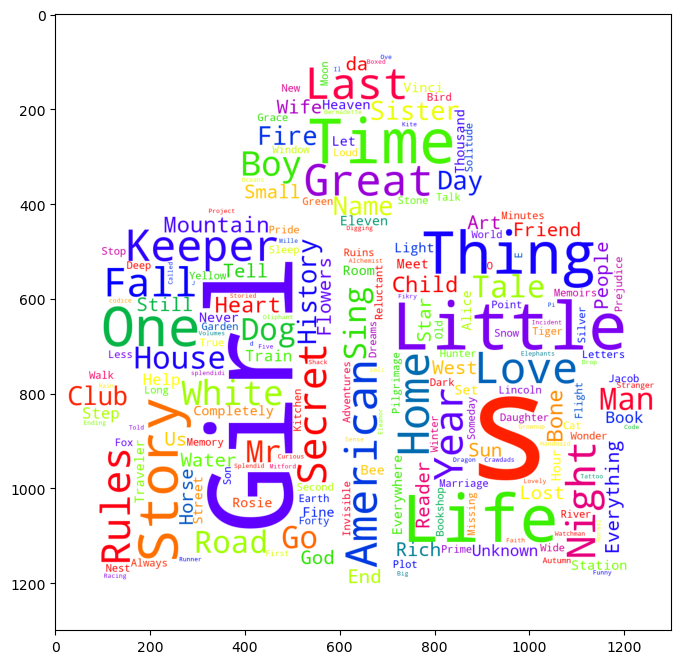

In [828]:
# Plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.grid(False)

- As observed in above wordcloud, we can see that the most common words for **`Fantasy`** books are dead, king, city and much more. Whenever a customer decides to buy a book, certain keywords tend to have a positive effect on the decision making process. If there a keyword that makes the customer think about a certain genre they might feel connected and hence these psychological factors should be taken into consideration

<hr style="width:100%;text-align:left;margin-left:0">

### <br>3. What genre and series category would attract more publishers based on average rating and review count?<br>
**Importance of Analysis:**<br>
According to our research through [Ibisworld](https://www.ibisworld.com/industry-statistics/market-size/book-publishing-united-states/#:~:text=The%20market%20size%2C%20measured%20by,decline%20%2D0.2%25%20in%202022), Book Publishing industry is estimated to have a $29.8bn markset size by revenue in 2022. But experts suggest that the market size has declined since 2017. <br>

- Being a dominant player in book sales industry Amazon can establish exclusive selling rights with the top publishers such that all the book published by them should be sold only through Amazon and the discussions about the book should be held on Goodreads. 
- By using this goodreads insights can be provided about what types of books have been performing well in the past few years and based on this trend whether they would be well received or not.

In [829]:
publisher_grouped = df_goodreads.groupby('publisher', dropna=True).agg({'id':'count'})
publisher_grouped = publisher_grouped.sort_values(by='id', ascending=False).head(10)
print('TOP 10 PUBLISHER COMPANIES\n')
print(publisher_grouped.rename(columns={'id':'Count'}))

TOP 10 PUBLISHER COMPANIES

                  Count
publisher              
HarperCollins       549
Vintage             519
Penguin Books       470
Ballantine Books    387
Bantam              370
Pocket Books        315
Avon                307
Berkley             286
Tor Books           276
HarperTeen          270


**Why should the publishers even care?**<br><br>
The traditional book publishing business involves publishing companies establishing contracts with authors and help them print, sell and distribute their books. Every publication house would want to maximize the sales for the books associated with them. Publishing companies want to establish long term contracts with the authors that have the best selling books. With the publishing industry in a decline they would be willing to invest in books that have the potential to earn more sales.<br><br> But how do they decide which type of books to pick? <br> <br>
We can recommend the top publisher like Vintage to form their decision of picking a book on 4 main factors - `Genre, Category of a book, Average rating, Review count`. We can use the below interactive chart and dropdowns to help the publishers decide the best books.

In [830]:
# Forming dropdown to list category of books according to series data
series_category_dropdown = Dropdown(options = ['Most frequent category', 'All categories', 'Individual book', 'Duology', 'Trilogy', 'Multiple books'],
                                    style={'description_width': 'initial'}, 
                                    description='Series Category:', 
                                    value = 'Duology')

In [831]:
# Function to filter the data to populate in the interactive chart based on values selected in dropdown
def filter_data(genre_value, series_category_value, df):
    filtered_df = df[df['main_genre'] == genre_value]
    filtered_df = filtered_df[['title','year_published','average_rating','rating_count', 'review_count','series_category']]
    filtered_df = filtered_df[filtered_df['year_published'].notnull()]
    filtered_df = filtered_df[filtered_df['year_published'] > 2000]
    
    if series_category_value == 'Most frequent category':
        category = df_goodreads.groupby('series_category').agg({'id':'count'})
        category.sort_values(by='id', ascending=False, inplace=True)
        category = category.head(1).index.values[0]
        filtered_df = filtered_df[filtered_df['series_category'] == category]
    
    elif series_category_value == 'All categories':
        category = ['Individual book', 'Duology', 'Trilogy', 'Multiple books']
        filtered_df = filtered_df[filtered_df['series_category'].isin(category)]
        
    else:
        filtered_df = filtered_df[filtered_df['series_category'] == series_category_value]

    return filtered_df    


In [832]:
# Function to build a scatter plot to visualize different genres, category of books with their average rating and review details
def display_chart(genre_value, series_category_value, df):
    df = filter_data(genre_value, series_category_value, df)
    size = df['review_count']

    fig = px.scatter(df, x="year_published", 
                     y="average_rating",
                     size='review_count',
                     color="series_category",
                     color_discrete_sequence=['#8b20c9','#f59953','#3344c4','#35b550'],
                     hover_name="title", log_x=True,
                     labels={"series_category": "Series Category"})

    fig.update_traces(mode='markers',
                      marker=dict(
                          size=size,
                          sizemode='area',
                          sizeref=2.*max(size)/(80.**2),
                          sizemin=4,
                          symbol='circle', 
                          line_width=1))

    fig.update_layout(
        title='Books rating distribution according to series type',
        xaxis=dict(
            title='Publish Year',
            gridcolor='white',
            type='log',
            gridwidth=1,
        ),
        yaxis=dict(
            title='Average Rating',
            gridcolor='white',
            gridwidth=1,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
    fig.show()

In [833]:
# Displaying genre and category dropdowns
display(genre_dropdown, series_category_dropdown)

Dropdown(description='Genre:', options=('Fiction', 'Fantasy', 'Romance', 'Young Adult', 'Nonfiction', 'Histori…

Dropdown(description='Series Category:', index=3, options=('Most frequent category', 'All categories', 'Indivi…

In [835]:
# Displaying the scatter chart to help publishers
display_chart(genre_dropdown.value, series_category_dropdown.value, df_goodreads)

Above chart denotes how the average trend looks like for a particular genre and category of book. Publishers can even compare the performance of all categories to form their decision. The review count i.e. the size of the diamond denotes the interaction with the book.<br><br>
**Observation 1**:<br>
- In the above case we can see that interaction and rating have both increased for **`Thriller`** books that are in **`Duology`** series. The trend looks linearly increasing with some highly rated books and through better interaction is conveys the books are being well recieved by the audience. <br>

**Observation 2**:<br>
- Another example is **`Children`** genre and **`Individual books`**, the trend shows that the average rating has gone up in the recent years but the interaction with the book has decreased which can indicate that the publisher should not proceed with such books
- One reason for such a trend could be because a lot of the educational content has moved to digital modes now through interactive games and videos hence such books are no longer in need 

Hence, based on this more publishers can be attracted by Amazon to form exclusive relationships to sell books. Also, Amazon can explore acquiring opportunities using this approach to maximize its profit through their own publishing unit called Amazon Publishing which already has 15 publishers associated with it.

**Another aspect - <u>Self publishing authors?</u>** <br>
Through our data we understand that some authors tend to self publish their books. There could be many reasons why an author would like to self publish, following could be a few of them according to us:
- to retain full control over their book
- they can acheive better royalties 
- you get to keep the full share of your profit 
- self publishing also reduces the time taken to publish since you do not have to go according to publisher's criteria 

According to our [research](https://selfpublishing.com/self-publishing-companies/) on top 10 platforms that authors use to self publish, we will now see the distribution of books across these publishing companies.

In [98]:
self_publishing_companies = ['self', 'self publish', 'selfpublish', 'pub yourself press', 'kindle', 'smashwords',
                             'barnes noble', 'kobo', 'lulu', 'apple book']

self_published_books = df_goodreads[df_goodreads['publisher'].str.contains('|'.join(self_publishing_companies), case=False, na=False)]

In [99]:
print('Number of self published books ->',len(self_published_books))

Number of self published books -> 336


Amazon allows authors to self publish their book for free with Kindle Direct Publishing so that their books can reach millions of users. Let us see how many books are actually published through Kindle or Amazon affiliated companies.

In [100]:
amazon_self_published_books_num = round(self_published_books['publisher'].str.contains('kindle|amazon', case=False).sum()/ len(self_published_books)*100,2)
print(f'{amazon_self_published_books_num}% of the books')

9.52% of the books


As we can see that only 9.52% of the books have been published through Kindle which means that there is scope for Amazon to expand or promote themselves in a better manner in the self publishing space. Authors can also be attracted through the above chart by helping them realise what genres should be pursue and eventually publish those books through Kindle or any Amazon affiliated publisher.
<hr style="width:100%;text-align:left;margin-left:0">

### 4. **Is there a tendancy to reduce the number of pages in recent books?** <br>
Let's now analyze some properties of the book itself like the page number and identify any trends that we can see. For better relevancy, we will only consider data of past 3 decades.

In [677]:
# Creating bins for grouping data according to year
year_bins = np.linspace(start=1991, stop=2021, num=7)
df_goodreads['year_group'] = pd.cut(df_goodreads['year_published'], year_bins)

In [678]:
# Grouping the data to find out average number of pages for that duration
df_year_grouped = df_goodreads.groupby('year_group').agg({'number_of_pages':'mean'})
df_year_grouped.reset_index(inplace=True)
df_year_grouped['year_group'] = df_year_grouped['year_group'].astype('str').str.split(',').str[1].str.split('\]').str[0]

In [679]:
# Plotting a graph to show the trend of average number of pages
import plotly.graph_objects as go

x = df_year_grouped['year_group'].astype(str)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y= df_year_grouped['number_of_pages'] ,
    connectgaps=True 
))

fig.update_layout(
    title="Trend of Number of Pages",
    xaxis_title="Publish Year",
    yaxis_title="Number of pages",
    font=dict(
        family="Courier New, monospace",
        size=14,
    )
)

fig.show()

As we can observe from the above graph, data shows a downward trend for number of pages for the past 3 decades. From this we can infer that there is infact a tendancy to reduce the number of pages in books in recent books. According to us, this trend could be due to the fact that we are moving into a more digital world and people prefer to multitask more and hence books having less number of pages containing abstract content. <br>

Also, reading a physical book has become more of a leisure activity and people are not allocating sufficient time for an individual activity. Since a larger proportion of people prefer to multitask on a regular basis, the audiobooks have gained popularity by monetizing this oppurtunity. Audiobooks have raisen in popularity as it appeals to even non-passionate readers to carry on with their day to day activities while listening to an audiobook.
<hr style="width:100%;text-align:left;margin-left:0">

### 4. Which books can be converted into audio books? What is the predicted price for such books?

<b>Why Audiobook?</b><br>
Previously, Everyone always had to choose between reading and other activities. With audiobooks, the amount of possible time for consuming books has drastically increased. Also, There are some books that are just hard to read or your attention span may not be great. At those times, audiobooks can greatly help. We spend so much time looking at screens, especially nowadays, and strain them. All of us need to give our eyes a break. Audiobooks help reduce strain on the eyes because they don’t need you to actually read. You can just listen. Your eyes get breaks even as you smash your reading goals.\
In addition, with the advent of audio books, the bookreading market has expanded with non passionate readers of books also entering the market, since previously in the physical books era, the market was restricted to passionate book lovers.

<b>What is Audible?</b><br>
Audible enriches the lives of millions of listeners by producing and distributing unique spoken-word entertainment and audiobooks. Audible is owned by Amazon. Amazon has a virtual stranglehold on the digital book business due to its Kindle e-readers and Audible audiobooks. The customer appears to have profited the most from this digital book monopoly as new books are now more affordable than ever.<br>

<b>Importance of Analysis:</b><br>
The Goodreads data along with the Audible data will enrich our analysis on books to be converted to audiobooks. 
Eventhough audiobooks are considered one of the the fastest expanding formats, the present economics of making an audiobook are difficult, particularly for individual authors.<br> The upcoming analysis will predict the selling price for the audio book. The predicted price of the audio book along with the above trend identified in the Goodreads data will help Amazon decide the the books to be converted to an audiobook.

According to our [research](https://blog.ironmarkusa.com/what-are-the-standard-book-sizes-in-publishing), books that are sold are of two types.
1. **Mass market paperbacks:** These books are usually sold at the airports, convenience stores and supermarkets. These are usually small in size and low priced. The usual size for these books is 4.25" x 6.87".
2. **Trade paperbacks:** These books are of high quality and are mostly sold at bookstores. The size of the U.S. Trade paperback is 6" X 9".

Since the users on Goodreads are mostly passionate readers, they tend to prefer the high quality Trade paperbacks and therefore, for our calculations we consider the US Trade paperback with the size **6" x 9"**.

For US Trade paperback of the 6" x 9" dimensions, the usual number of words per page is 300, according to our [research](https://www.jodibrandoneditorial.com/blog/word-count-how-many-words-should-your-book-be#:~:text=For%20the%20larger%2C%206%20x,for%20a%20200%2Dpage%20book.).

The average narration speed in an audio book is **150 words per minute (wpm)**. Although, there is an option to increase the speed and slow it down in an audio book, we take into consideration the standard speed of 150wpm as mentioned [here](https://thebookbuff.com/is-an-audiobook-faster-than-reading/#:~:text=The%20average%20reader%20reads%20200,not%20because%20of%20the%20speed.).

In [104]:
# Dropping all the rows with null values in the number of pages column to facilitate an accurate data analysis
goodreads_df.drop(goodreads_df[goodreads_df['number_of_pages'].isnull()].index, inplace=True)

In [105]:
#Declare the number of words per page (1)
words_per_page = 300

# Determine the duration of an audio book in minutes for a current physical book
goodreads_df['Duration'] = (goodreads_df['number_of_pages']*words_per_page)/150

In [106]:
# Convert the type to int
goodreads_df['Duration'] = goodreads_df['Duration'].astype(int)

In [107]:
# Drop all the rows with zero duration
goodreads_df.drop(goodreads_df[goodreads_df['Duration'] == 0].index, inplace=True)

**Mapping the genres in Goodreads to the ones that are in Audible dataset**

In [108]:
# Audiobook genres
audible_df['category'].unique()

array(['Bios & Memoirs', 'Business', 'Mysteries & Thrillers', 'Fiction',
       'Radio & TV', 'Sci-Fi & Fantasy', 'Classics', 'Comedy',
       'Drama & Poetry', 'History', 'Nonfiction', 'Sports', 'Teens',
       'Religion & Spirituality', 'Self Development',
       'Erotica & Sexuality', 'Kids', 'Travel & Adventure',
       'Science & Technology', 'Romance', 'Health & Fitness',
       'Arts & Entertainment', 'Newspapers & Magazines', 'Live Events',
       'Language Instruction', 'Nostalgia Radio'], dtype=object)

In the Goodreads dataset we have different set of genres as compared to the genres in the Audible dataset. To get uniformity in genres for our regression model, the genres in the Goodreads dataset need to be mapped to the ones in the Audible Dataset. In order to achieve this, we need to find the semantic similarity between the genres and map to the one with highest similarity score.\
We utilize **Universal Sentence Encoder** to find the semantic similarity which is part of the **[tensorflow_hub](https://www.tensorflow.org/hub)** library.

We observe that there is a genre called **Live Events** in the audible dataset which is not relevant to the physical books genre since live events cannot be recorded in the form of book. So to map the genres we drop the genre from the audible dataset.

In [109]:
# Drop the Live Events genre books
audible_modeling_df = audible_df.drop(audible_df[audible_df['category'] == 'Live Events'].index)

In [110]:
# Load the universal-sentence encoder model
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" 
model = hub.load(module_url)

In [111]:
# Define a function to map the genres
audible_genres = audible_modeling_df['category'].unique()
goodreads_genres = goodreads_df['main_genre'].unique()

def map_genres(genres, model):
    
    mapped_genres = []
    
    # Loop through the goodreads_genres and map them
    for genre in genres:
        genre_embedding = model(np.array([genre]+list(audible_genres)))
        dists = list(np.inner(genre_embedding[0], genre_embedding))
        dist_list = dists[1:]
        index = dist_list.index(max(dist_list))
        mapped_genres.append(audible_genres[index])
    
    return mapped_genres

In [112]:
# New genres
new_genres = map_genres(goodreads_genres, model)

In [113]:
# Create a mapping dictionary
genre_map_dict = dict(zip(goodreads_genres, new_genres))

In [114]:
goodreads_df['Mapped_Genre'] = goodreads_df['main_genre'].apply(lambda x: genre_map_dict.get(x))
goodreads_df.head()

,id,title,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,...,genre_and_votes,characters,awards,series_name,book_number_in_series,main_genre,year_published,series_category,Duration,Mapped_Genre
0,630104,Inner Circle,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,...,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,Private,5,Young Adult,2007,Multiple books,440,Teens
1,9487,A Time to Embrace,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,...,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,Love,2,Christian Fiction,2006,Multiple books,800,Fiction
2,6050894,Take Two,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,...,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,Line,2,Christian Fiction,2009,Multiple books,640,Fiction
3,39030,Reliquary,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,...,"Thriller 626, Mystery 493, Horror 432, Fiction...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,Pendergast,2,Thriller,1997,Trilogy,928,Mysteries & Thrillers
4,998,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,...,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,NaN,Economics-Finance,1995,Individual book,516,Business


In [115]:
# Convert all the numeric columns to float type
audible_df = audible_df.astype({'price':'float', 'rating':'float', 'rating_count':'float'})

**Self Narrators**

In [116]:
# Determine how many authors to prefer to narrate their books themselves.
self_narration_mask = (audible_df['author']==audible_df['narrator'])
self_narration_mask.sum()

41422

We observe that there are many authors who prefer to narrate their books on thier own. This can play an important role in determining the price of the audio book. Therefore, let us add a column with a dummy variable 1 specifying that the book is narrated by the author himself/herself and 0 otherwise.

In [117]:
# Add a new column self narration as a dummy variable
audible_df['Self Narration'] = self_narration_mask.map(lambda x: 1 if x else 0)

In [118]:
# Determine the average price and rating of author narrations vs other narrations
audible_df.groupby('Self Narration').agg({'title':'count', 'rating':'mean', 'price':'mean'})

,title,rating,price
Self Narration,,,
0,281873,3.195914,15.547989
1,41422,2.970523,13.699045


- We observe that the price of the audiobooks which are narrated by the author themselves have a lower average price compared to the ones which are narrated by other narrators. 
<br><br>
- It can be inferred that hiring narrators to narrate their book costs the publication house or the authors a lot of money and therefore to recover costs pricing them high makes sense, whereas when narrated by themselves, they have the room to price the books less.

**Author-narrator collaborations**

In [119]:
# Determine the number of author-narrator pair collaborations
author_narrator_df = audible_df[audible_df['Self Narration'] == 0].groupby(['author', 'narrator']).agg({'title':'count', 'rating': 'mean'})

In [120]:
# Rename columns and sort by the ratings
author_narrator_df = author_narrator_df.rename(columns={'title':'Number of Collaborations', 'rating':'Average Rating'}).sort_values(by='Number of Collaborations', ascending=False)
author_narrator_df

Number of Collaborations  \
author                           narrator                                                                 
Verbal Advantage                 Charles Harrington Elster                                          482   
Society for Science & the Public Mark Moran                                                         403   
IntroBooks                       Andrea Giordani                                                    374   
Charles River Editors            Scott Clem                                                         270   
                                 Colin Fluxman                                                      243   
...                                                                                                 ...   
Holly Brown                      Arielle DeLisle                                                      1   
                                 Hillary Huber, Angela Goethals, James Fouhey                         1   
                                 Khristine Hvam, James Patrick Cronin                                 1   
                                 Madeleine Maby, Donna Postel                                         1   
Śāntideva                        William Hope                                                         1   

                                                                               Average Rating  
author                           narrator                                                      
Verbal Advantage                 Charles Harrington Elster                           0.000000  
Society for Science & the Public Mark Moran                                          1.966501  
IntroBooks                       Andrea Giordani                                     1.328877  
Charles River Editors            Scott Clem                                          3.001852  
                                 Colin Fluxman                                       3.362140  
...                                                                                       ...  
Holly Brown                      Arielle DeLisle                                     4.000000  
                                 Hillary Huber, Angela Goethals, James Fouhey        4.000000  
                                 Khristine Hvam, James Patrick Cronin                4.000000  
                                 Madeleine Maby, Donna Postel                        4.000000  
Śāntideva                        William Hope                                        4.500000  

[181885 rows x 2 columns]

In [121]:
# Determine the author-narrator pairs with atleast 5 collaborations
author_narrator_df[author_narrator_df['Number of Collaborations'] >= 5]

Number of Collaborations  \
author                           narrator                                              
Verbal Advantage                 Charles Harrington Elster                       482   
Society for Science & the Public Mark Moran                                      403   
IntroBooks                       Andrea Giordani                                 374   
Charles River Editors            Scott Clem                                      270   
                                 Colin Fluxman                                   243   
...                                                                              ...   
Swami Vivekananda                Clay Lomakayu                                     5   
Mike Riley                       Stephen Paul Aulridge Jr                          5   
Jamila Jasper                    Zoe Cox                                           5   
Tonya Kappes                     Hillary Huber                                     5   
Sarah Sophia                     Donna Havern                                      5   

                                                            Average Rating  
author                           narrator                                   
Verbal Advantage                 Charles Harrington Elster        0.000000  
Society for Science & the Public Mark Moran                       1.966501  
IntroBooks                       Andrea Giordani                  1.328877  
Charles River Editors            Scott Clem                       3.001852  
                                 Colin Fluxman                    3.362140  
...                                                                    ...  
Swami Vivekananda                Clay Lomakayu                    4.800000  
Mike Riley                       Stephen Paul Aulridge Jr         4.000000  
Jamila Jasper                    Zoe Cox                          3.100000  
Tonya Kappes                     Hillary Huber                    4.500000  
Sarah Sophia                     Donna Havern                     0.000000  

[6625 rows x 2 columns]

In [122]:
# Determine the author-narrator pair with atleast 5 collaborations and 4.0 avergae rating
author_narrator_df[(author_narrator_df['Average Rating'] >= 4.0) & (author_narrator_df['Number of Collaborations'] >= 5)]

,,Number of Collaborations,Average Rating
author,narrator,,
Gertrude Chandler Warner,Aimee Lilly,84,4.428571
Ace McCloud,Joshua Mackey,82,4.201220
Barbara Cartland,Anthony Wren,72,4.076389
Gunsmoke,William Conrad,72,4.527778
Agatha Christie,Hugh Fraser,71,4.401408
...,...,...,...
Irina Shapiro,Wendy Wolfson,5,4.600000
Martin Walker,Peter Noble,5,4.400000
Swami Vivekananda,Clay Lomakayu,5,4.800000


- There are many author-narrator pairs with a lot of collaborations between them. But only a few pairs are successful and have captivated the listeners, which is evident from the very few pairs having an average rating above 4.
<br><br>
- It can be inferred that the authors or the publishers of the books have hired a narrator for a certain number of narrations through a package deal, since despite low ratings, they have continued the collaboration as seen from the high number of collaborations.
<br><br> 
- It is therefore advisable to the authors or the publishing houses to sign or hire narrators for a narration per book instead of signing a package deal with them for a number of books. This will give them the flexibility to change the narrator for their next book, if the previous book has not received good ratings.

#### Find the collaborations and individual narrations 

There are audio books that are narrated by individual narrators and there are some which are narrated by multiple narrators.

In [123]:
# Get the mask to determine books with multiple narrators
collaboration_mask = audible_df['narrator'].str.split(',').map(lambda x: len(x)) > 1
collaboration_mask.sum()

23600

In [124]:
# Add a new column collaboration as a dummy variable with 1 signifying multiple narrators and 0 a single narrator
audible_df['Collaboration'] = collaboration_mask.map(lambda x: 1 if x else 0)

In [125]:
# Group by collaboration and determine the mean rating, mean rating count and mean price
audible_collab_group = audible_df.groupby('Collaboration').agg({'title':'count', 'rating':'mean', 'rating_count':'mean', 'price':'mean'})

In [126]:
audible_collab_group = audible_collab_group.rename(columns={'title':'Number of Collaborations', 'rating':'Average Rating', 'rating_count':'Average Rating Count', 'price':'Average Price'}).sort_values(by='Number of Collaborations', ascending=False)
audible_collab_group

,Number of Collaborations,Average Rating,Average Rating Count,Average Price
Collaboration,,,,
0,299695,3.147076,109.052136,15.209712
1,23600,3.420508,192.300127,16.598547


- We observe from the above analysis that the rating_count for the audio books narrated by mulitple narrators together is higher than the books that are narrated by an individual.
<br><br>
- It can be inferred from the data that listeners enjoy multiple characters voiced over by different narrators, which in turn increases the engagement as evident by the high average rating count.

**Duration vs rating analysis**

In [127]:
# Create bins to categorize books into different categories.
# duration_bins = np.linspace(start=min(audible_df['length']), stop=max(audible_df['length']), num=20)
duration_bins = np.linspace(start=0, stop=9600, num=17)
audible_df['duration_group'] = pd.cut(audible_df['length'], duration_bins)

In [128]:
# Group by duration group and determine the average rating and number of books in each category
audible_duration_group = audible_df.groupby('duration_group').agg({'title':'count', 'rating':'mean'})

In [129]:
# Determine the percentage of books in each category
audible_duration_group['title'] = audible_duration_group['title'].apply(lambda x: x*100/audible_duration_group['title'].sum())

In [130]:
# Rename the columns and sort it by percentage of books in each duration group
audible_duration_group = audible_duration_group.rename(columns={'title':'Percentage of Books', 'rating':'Average Rating'})
audible_duration_group

,Percentage of Books,Average Rating
duration_group,,
"(0.0, 600.0]",81.622036,3.016725
"(600.0, 1200.0]",16.832761,3.846701
"(1200.0, 1800.0]",1.201123,4.073719
"(1800.0, 2400.0]",0.220337,4.180516
"(2400.0, 3000.0]",0.063765,4.165842
"(3000.0, 3600.0]",0.027148,4.087209
"(3600.0, 4200.0]",0.012311,4.064103
"(4200.0, 4800.0]",0.009154,4.379310
"(4800.0, 5400.0]",0.005998,4.368421


- It is clear from the analysis that a large propotion of the audio books i.e. 81.62% run under 600 minutes (10 hours).
<br><br>
- Hence, it can be inferred that there is a large market for the audiobooks under 10 hours and therefore, it is recommended to convert only those physical books whose duration is under 600 miuntes.

#### Regression model to predict price of Goodreads books when converted into audio books

For the regression analysis, we consider **`length, rating, rating_count, category (dummy)`** as independent variables and **`price`** as the dependent or target variable.\
We train and validate the model on the Audible dataset and deploy on the Goodreads dataset to predict the price of a book if converted into an audio book.

In [140]:
# Create bins to categorize books into different categories.
# duration_bins = np.linspace(start=min(audible_df['length']), stop=max(audible_df['length']), num=20)
price_bins = np.linspace(start=0, stop=200, num=11)
audible_df['price_group'] = pd.cut(audible_df['price'], price_bins)

In [141]:
# Create a data frame for regression analysis
regression_df = audible_df.copy(deep=True)[['length', 'rating', 'rating_count', 'category', 'price']]

In [142]:
# Group by duration group and determine the average rating and number of books in each category
audible_price_group = audible_df.groupby('price_group').agg({'title':'count'})

In [143]:
# Rename the columns and sort it by percentage of books in each duration group
audible_price_group = audible_price_group.rename(columns={'title':'Number of Books'})
audible_price_group

,Number of Books
price_group,
"(0.0, 20.0]",230865
"(20.0, 40.0]",88715
"(40.0, 60.0]",2045
"(60.0, 80.0]",68
"(80.0, 100.0]",60
"(100.0, 120.0]",78
"(120.0, 140.0]",0
"(140.0, 160.0]",0
"(160.0, 180.0]",25


We observe that a large percentage of audiobooks are priced under $60. Since the books higher prices will reduce the accuracy of the model as they are outliers, we filter out these outliers in the training data.

In [144]:
# Filter out the outliers
regression_df = regression_df[regression_df['price'] <= 60]
regression_df.reset_index(inplace=True, drop=True)

 As mentioned before, since **Live Events** genre is not relevant to the physical books, we drop the books belonging to that genre from our training data.

In [146]:
# Drop the Live Events genre books
regression_df.drop(regression_df[regression_df['category'] == 'Live Events'].index, inplace=True)
regression_df.head()

,length,rating,rating_count,category,price
0,590.0,3.5,76.0,Bios & Memoirs,27.97
1,100.0,4.0,37.0,Business,7.95
2,72.0,3.5,11.0,Business,4.95
3,303.0,3.5,14.0,Mysteries & Thrillers,11.90
4,304.0,3.0,16.0,Mysteries & Thrillers,12.60


#### Splitting the Data for Training and Testing

In [147]:
# Get the data for training and testing
regression_data = regression_df[['length', 'rating', 'rating_count', 'category']]
regression_data['length_squared'] = regression_data['length'].apply(lambda x: x**2)

# Transform the category column to dummy variables
regression_data = pd.get_dummies(regression_data, drop_first=True)

# Determine the target variable for the model
regression_target = regression_df['price']

In [148]:
# Split arrays into train and test subsets which will be randomly selected
X_train, X_test, y_train, y_test = train_test_split(regression_data.values, regression_target.values, random_state=11)

In [149]:
# Confirm the **75%–25% train-test split** 
print(X_train.size, 'items --', X_train.size/(X_train.size + X_test.size) * 100)
print(X_test.size, 'items --', X_test.size/(X_train.size + X_test.size) * 100)

6775216 items -- 74.99984502371137
2258424 items -- 25.00015497628863


#### Training the Model

In [150]:
# Train the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [152]:
# Slope is the estimator’s **`coeff_`** attribute (**m** in the equation) 
for i, name in enumerate(regression_data): #enumerate adds a number to an iteration
    print(f'{name:>10}: {linear_regression.coef_[i]}')  

# Intercept is the estimator’s **`intercept_`** attribute (**b** in the equation)
print(linear_regression.intercept_)  # Intercept is the estimator’s **`intercept_`** attribute (**b** in the equation)

    length: 0.02898599015661253
    rating: 0.361080788573515
rating_count: 0.00022376541204048654
length_squared: -5.596996950851807e-06
category_Bios & Memoirs: 2.6536661587678156
category_Business: 1.7345557572560188
category_Classics: 0.6455554195039833
category_Comedy: 1.1116064674594732
category_Drama & Poetry: 0.4072279490326455
category_Erotica & Sexuality: -0.36314073609488456
category_Fiction: 1.9479339515143816
category_Health & Fitness: 0.9287877548541545
category_History: 2.491248718846486
category_Kids: 1.4241225417868428
category_Language Instruction: 2.647676385773693
category_Mysteries & Thrillers: 2.3473120368980283
category_Newspapers & Magazines: -2.3092604191015367
category_Nonfiction: 2.39264484498938
category_Nostalgia Radio: 2.3235878964417602
category_Radio & TV: -0.7279894042268251
category_Religion & Spirituality: 1.7673693176161969
category_Romance: 1.8146655584582243
category_Sci-Fi & Fantasy: 1.6715788375501963
category_Science & Technology: 1.563158101171

#### Testing the Model

In [153]:
# Determine the predicted values for test data
expected = y_test
predicted = linear_regression.predict(X_test)

In [154]:
print('Expected', expected[:5])   # first five targets 
print('Predicted', predicted[:5])  # first 5 predictions

Expected [ 6.95 34.99  0.95  6.95 21.31]
Predicted [ 8.99930952 23.41751786  1.58026553  7.38692856 29.33045521]


#### Visualizing the Expected vs. Predicted Prices 

In [155]:
result_df = pd.DataFrame()
result_df['Expected'] = pd.Series(expected)
result_df['Predicted'] = pd.Series(predicted)
result_df.head()

,Expected,Predicted
0,6.95,8.999310
1,34.99,23.417518
2,0.95,1.580266
3,6.95,7.386929
4,21.31,29.330455


#### Evaluating the Regression Model

In [156]:
# Get the accuracy of the model
print(f'Explained Variance : {metrics.r2_score(expected, predicted):.2f}')

# Determine the rmse
print(f'Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(expected, predicted)):.2f}')

# Determine the rmse
print(f'Mean Absolute Error : {metrics.mean_squared_error(expected, predicted):.2f}')

Explained Variance : 0.70
Root Mean Squared Error : 5.18
Mean Absolute Error : 26.82


#### Applying the model on Goodreads data to predict price

In [157]:
# Deploy the model on the goodreads dataset
goodreads_regression_data = goodreads_df.copy()[['Duration', 'average_rating', 'rating_count', 'Mapped_Genre']]
goodreads_regression_data['Duration_Squared'] = goodreads_regression_data['Duration']**2
goodreads_regression_data = pd.get_dummies(goodreads_regression_data, drop_first=True)
goodreads_regression_data.head()

,Duration,average_rating,rating_count,Duration_Squared,Mapped_Genre_Bios & Memoirs,Mapped_Genre_Business,Mapped_Genre_Classics,Mapped_Genre_Comedy,Mapped_Genre_Drama & Poetry,Mapped_Genre_Erotica & Sexuality,...,Mapped_Genre_Nostalgia Radio,Mapped_Genre_Radio & TV,Mapped_Genre_Religion & Spirituality,Mapped_Genre_Romance,Mapped_Genre_Sci-Fi & Fantasy,Mapped_Genre_Science & Technology,Mapped_Genre_Self Development,Mapped_Genre_Sports,Mapped_Genre_Teens,Mapped_Genre_Travel & Adventure
0,440,4.03,7597,193600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,800,4.35,4179,640000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,640,4.23,6288,409600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,928,4.01,38382,861184,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,516,4.04,72168,266256,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
# lambda implements y = mx + b
predict = lambda x: np.dot(linear_regression.coef_, x) + linear_regression.intercept_

In [159]:
# Determine the predicted prices for Goodreads books
goodreads_predicted_price = []
for book in goodreads_regression_data.values:
    goodreads_predicted_price.append(round(predict(book),2))

In [160]:
goodreads_df.columns

Index(['id', 'title', 'author', 'rating_count', 'review_count',
       'average_rating', 'five_star_ratings', 'four_star_ratings',
       'three_star_ratings', 'two_star_ratings', 'one_star_ratings',
       'number_of_pages', 'publisher', 'genre_and_votes', 'characters',
       'awards', 'series_name', 'book_number_in_series', 'main_genre',
       'year_published', 'series_category', 'Duration', 'Mapped_Genre'],
      dtype='object')

In [161]:
# Appending predicted price as column to main dataset
goodreads_df['predicted_audiobook_price'] = goodreads_predicted_price
goodreads_df.sort_values(by='rating_count', ascending=False)[['title', 'author', 'predicted_audiobook_price']].head(10)

,title,author,predicted_audiobook_price
11145,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Olly Moss",1546.36
37099,Harry Potter and the Sorcerer's Stone,"J.K. Rowling, Mary GrandPrÃ©",1538.85
37059,The Hunger Games,Suzanne Collins,1415.03
37064,Twilight,Stephenie Meyer,1111.48
37061,To Kill a Mockingbird,Harper Lee,996.78
37090,The Great Gatsby,"F. Scott Fitzgerald, Francis Scott Fitzgerald",835.54
30823,The Fault in Our Stars,John Green,795.82
37071,The Fault in Our Stars,John Green,790.85
12854,1984,"George Orwell, Erich Fromm",698.37
37152,1984,George Orwell,690.55


In [162]:
goodreads_df['predicted_audiobook_price'].describe()

count    45736.000000
mean        27.520154
std         37.218547
min      -4023.670000
25%         20.110000
50%         24.795000
75%         29.950000
max       1546.360000
Name: predicted_audiobook_price, dtype: float64

#### How to attract the people to the Audio Book Market?

- Since audiobook is an experience good, people need to experience the good to determine their willingness to pay. Audiobooks enjoy the vital advantage over physical books when giving the book lovers this experience to get the taste of the product.
<br><br>
- Publishers can let the potential buyers experience the audio book by giving them permission to listen to the first chapter of the book for free, which lets them experience the good. This facility is totally absent in the physical book. This facility will help attract book lovers to the audio book market.

# Conclusion

<hr style="width:100%;">
CONCLUSION REMAINING

# References
<hr style="width:100%">

-  https://becomeawritertoday.com/average-length-of-a-book/
-  https://selfpublishing.com/self-publishing-companies/ 
- https://www.ibisworld.com/industry-statistics/market-size/book-publishing-united-states/#:~:text=The%20market%20size%2C%20measured%20by,decline%20%2D0.2%25%20in%202022. 
- https://selfpublishing.com/self-publishing-companies/
https://www.nosegraze.com/goodreads-gets-bought-by-amazon-why-this-is-awesome-news/
- https://techpenny.com/audible-voice-narrating/#:~:text=Audible%20offers%20a%20huge%20range,for%20specific%20and%20stylistic%20reasons
- https://towardsdatascience.com/scraping-and-exploring-the-entire-english-audible-catalog-ea279cd09f88